# MACS 207b

In [108]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from multiprocessing import Pool

## Simulation

### Simulation des trajectoires

__Paramètres__

In [109]:
alph = 1
mu1 = 0.1
mu2 = 0.2
r = 1
lam = 5
pi = 0.8
p=0.5

exp = np.random.exponential

Ici nous définissons la fonction qui va nous permettre de simulé un transition du processus de markov.

In [110]:
def step(n1,n2,p):
    # q1 , q2, q3, q4, q5
    if n1 + n2 ==0:
        prop = 0
    else: 
        prop = n1/(n1+n2)
    params = np.array([r+lam*pi*prop,
              mu1*n1,
              alph*p*n2*prop,
              lam*(1-pi*prop),
              mu2*n2])
    params2 = []
    for i in range(5):
        if params[i]==0:
            params2.append(np.inf)
        else:
            params2.append(1/params[i])
    temps = exp(params2)
    index = np.argmin(temps)
    if index ==0:
        n1+=1
    if index ==1:
        n1-=1
    if index ==2:
        n2 -=1
        n1 +=1
    if index ==3:
        n2+=1
    if index ==4:
        n2-=1
    return n1, n2, temps[index]

Ensuite nous définissons la fonction qui simule une trajectoire jusqu'à $t=100$.

In [113]:
def trajectoire(p):
    preval = 0
    for i in range(500):
        n1 = 100
        n2 = 100
        t = 0
        while(t<100):
            n1,n2,tp = step(n1,n2,p)
            t+=tp
        preval += n1/(n1+n2)
    return preval/500

Enfin nous réalisons 500 simulations pour 20 valeurs différentes de $p$ (entre $0$ et $0.6$), c'est à dire $10 000$ simulations au total. 

In [114]:
pool= Pool()
ps= np.linspace(0.01,0.6,20)

result = pool.map(trajectoire,ps)
pool.close()

### Comparaison avec la théorie

On utilise Scipy pour résoudre le système différentiel déterministe. 

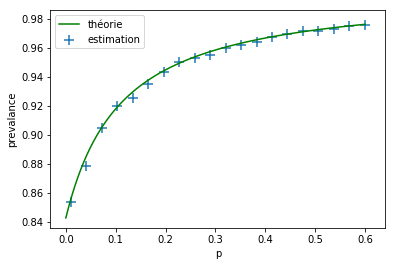

In [116]:
N = 100
def diff_model(y,t,p):
    r = (N)/100*1
    lam = (N)/100*5
    yp1 = r +lam*pi*(y[0]/(y[0]+y[1]))-mu1*y[0] + alph*p*(y[0]*y[1])/(y[0]+y[1])
    yp2 = lam*(1-(pi*y[0])/(y[0]+y[1])) - mu2*y[1] - alph*p*y[0]*y[1]/(y[0]+y[1])
    return np.array([yp1,yp2])

p_l = np.linspace(0,0.6,100)
prevalance = []
for pI in p_l:
    y = odeint(diff_model,y0,t,(pI,))
    prevalance.append(y[-1,0]/(y[-1,0]+y[-1,1]))
plt.figure()
plt.plot(p_l,prevalance,'g')

plt.xlabel('p')
plt.ylabel('prevalance')
    
plt.scatter(ps ,result, s= 110,marker = '+')
plt.legend(("théorie", "estimation"))
plt.show()

On obtient des résulats similaire à ceux avancé dans la figure 3 de l'article.

### Simulation des trajectoire de $X^N$

On adapte légèrement les fonctions définies pour les premères simulations.

In [87]:
def step2(n1,n2,p,N):
    # q1 , q2, q3, q4, q5
    alph = 1
    mu1 = 0.1
    mu2 = 0.2
    r = (N)/100*1
    lam = (N)/100*5
    pi = 0.8
    p=0.5
    if n1 + n2 ==0:
        prop = 0
    else: 
        prop = n1/(n1+n2)
    params = np.array([r+lam*pi*prop,
              mu1*n1,
              alph*p*n2*prop,
              lam*(1-pi*prop),
              mu2*n2])
    params2 = []
    for i in range(5):
        if params[i]==0:
            params2.append(np.inf)
        else:
            params2.append(1/params[i])
    temps = exp(params2)
    index = np.argmin(temps)
    if index ==0:
        n1+=1
    if index ==1:
        n1-=1
    if index ==2:
        n2 -=1
        n1 +=1
    if index ==3:
        n2+=1
    if index ==4:
        n2-=1
    return n1, n2, temps[index]


def trajectoire2(p,N):
    time = [0]
    n1 = N//2
    n2 = N//2 + N%2
    X1N=[n1/(N)]
    X2N=[n2/(N)]  
    t=0
    while(t<80):
        n1,n2,tp = step2(n1,n2,p,N)
        time.append(tp+time[-1])
        X1N.append(n1/(N))
        X2N.append(n2/(N))  
        t+=tp
    return X1N, X2N, time

Pour voir la convergence on prend $N=100,1000,10000$.

In [90]:
a10k,b10k,c10k = trajectoire2(0.5,10000)
a1k,b1k,c1k = trajectoire2(0.5,1000)
a,b,c = trajectoire2(0.5,100)

### Comparaison avec la théorie

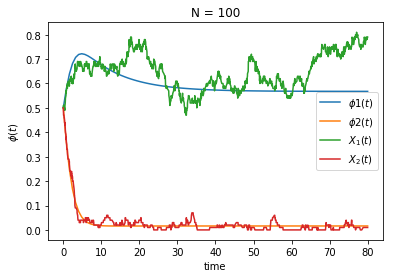

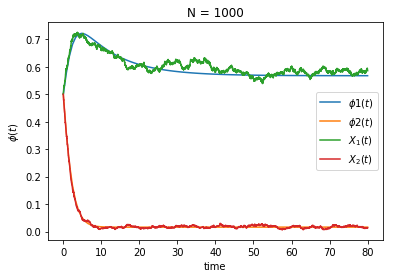

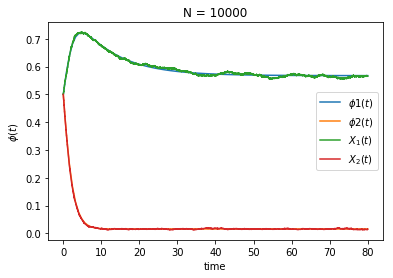

In [95]:
# initial condition
y0 = np.array([N//2, N//2 + N%2])

# time points
t = np.linspace(0,80,100)

# solve ODE
y = odeint(diff_model,y0,t,(p,))

# plot results
plt.figure()
plt.title("N = 100")
plt.plot(t,y.T[0]/N)
plt.plot(t,y.T[1]/N)
plt.plot(c,a)
plt.plot(c,b)
plt.xlabel('time')
plt.ylabel('$\phi(t)$')
plt.legend(('$\phi1(t)$', '$\phi2(t)$','$X_1(t)$','$X_2(t)$'))
plt.show()

plt.figure()
plt.title("N = 1000")
plt.plot(t,y.T[0]/N)
plt.plot(t,y.T[1]/N)
plt.plot(c1k,a1k)
plt.plot(c1k,b1k)
plt.xlabel('time')
plt.ylabel('$\phi(t)$')
plt.legend(('$\phi1(t)$', '$\phi2(t)$','$X_1(t)$','$X_2(t)$'))
plt.show()

plt.figure()
plt.title("N = 10000")
plt.plot(t,y.T[0]/N)
plt.plot(t,y.T[1]/N)
plt.plot(c10k,a10k)
plt.plot(c10k,b10k)
plt.xlabel('time')
plt.ylabel('$\phi(t)$')
plt.legend(('$\phi1(t)$', '$\phi2(t)$','$X_1(t)$','$X_2(t)$'))
plt.show()

On peut observer que le processus $\frac{X^N}{N}$ converge bien vers le modèle déterministe.